<a href="https://colab.research.google.com/github/mveer1/Jupyter-Notebooks/blob/main/DSinPy/Linked_Lists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linked list**
Not sequenctial
Each node is a object that contains link to next item and a value of its own
Its one directional from start(head) to end, start's address is given along with the list
the last item doesnt have a valid address in it.

Dynamic data structure, we can change during the program, and does not have a fixed size.
In many ways, its better than arrays, except random access through indexes is not possible and its implementation requires extra memory

1. Single linked lists
2. Double linked lists
3. Circular linked lists
4. Linked lists with Header Node
5. Sorted linked lists

## Single
Comes with a start refrence
In python, we end the linked list when the link part of any node is "None"
Empty LL has the start as None

In [ ]:
class Node:
    def __init__(self, value):
        self.info = value
        self.link = None

class SingleLinkedList:
    def __init__(self):
        self.start = None

    def display_list(self):
        if self.start is None:
            print("List if empty")
            return
        else:
            print("List is: ")
            p = self.start
            while p is not None:
                print(p.info, " ", end='')
                p=p.link
            print()

    def count_nodes(self):
        p = self.start
        n = 0
        while p is not None:
            n+=1
            p = p.link
        print("Number of nodes in the list = " ,n)

    def search(self,x):
        position = 1
        p = self.start
        while p is not None:
            if p.info == x:
                print(x , " is at position ", position)
                return True
                position+=1
                p = p.link
            else:
                print(x," not found in list")
                return False

    def insert_in_beginning(self, data):
        temp = Node(data)
        temp.link = self.start
        self.start = temp

    def insert_at_end(self, data):
        temp = Node(data)
        if self.start is None:
            self.start = temp
            return
        
        p = self.start
        while p.link is not None:
            p = p.link
        p.link = temp

    def create_list(self):
        n = int(input("Enter the number of nodes : "))
        if n == 0:
            return
        for i in range(n):
            data = int(input("Enter the element to be inserted : "))
            self.insert_at_end(data)


    def insert_after(self, data, x):
        p = self.start
        while p is not None:
            if p.info == x:
                break
            p = p.link
        if p is None:
            print(x, "not present in the list")
        else:
            temp = Node(data)
            temp.link = p.link
            p.link = temp


    def insert_before(self, data, x):
        # If list is empty
        if self.start is None:
            print("List is empty")
            return
        
        # x is in first node,new node is to be inserted before first node
        if x == self.start.info:
            temp = Node(data)
            temp.link = self.start
            self.start = temp
            return
        
        # Find reference to predecessor of node containing x
        p = self.start
        while p.link is not None:
            if p.link.info == x:
                break
            p = p.link

        if p.link is None:
            print(x, " not present in the list")
        else:
            temp = Node(data)
            temp.link = p.link
            p.link = temp 


    def insert_at_position(self, data, k):
        if k == 1:
            temp = Node(data)
            temp.link = self.start
            self.start = temp
            return
        
        p = self.start
        i=1
        while i<k-1 and p is not None:  #find a referecne to k-1 node
            p = p.link
            i+=1

        if p is None:
            print("You can insert only upto position", i)
        else:
            temp = Node(data)
            temp.link = p.link
            p.link = temp


    def delete_node(self,x):

        if self.start is None:
            print("List is empty")
            return

        # Deletion of first node
        if self.start.info == x:
            self.start = self.start.link
            return

        # Deletion in between or at the end
        p = self.start
        while p.link is not None:
            if p.link.info == x:
                break
            p = p.link

        if p.link is None:
            print("Flement ", x ,"not in list")
        else:
            p.link = p.link.link


    def delete_first_node(self):
        if self.start is None:
            return
        self.start = self.start.link


    def delete_last_node(self):
        if self.start is None:   #list is empty
            return

        if self.start.link is None:   #list has only one, well now zero
            self.start = None
            return

        p = self.start
        while p.link.link is not None:
            p = p.link
        p.link = None

   
    def reverse_list(self):
        prev = None
        p = self.start
        while p is not None:
            next = p.link
            p.link = prev

            prev = p
            p = next
        self.start = prev

    def bubble_sort_exdata(self):
        end = None              #explanation belowe

        while end != self.start.link:
            p = self.start
            while p.link != end:
                q = p.link
                if p.info > q.info:
                    p.info,q.info = q.info,p.info
                p = p.link
            end = p

    def bubble_sort_exlinks(self):
        end = None
        while end != self.start.link:
            r = p = self.start
            while p.link != end:
                q = p.link
                if p.info > q.info :
                    p.link = q.link
                    q.link = p
                    if p!=self.start:
                        r.link = q
                    else:
                        self.start = q
                    p,q = q,p
                r = P
                p = p.link
            end = p


    def has_cycle(self):
        if self.find_cycle() is None:
            return False
        else:
            return True


    def find_cycle(self):
        if self.start is None or self.start.link is None:
            return None
        
        slowR = self.start
        fastR = self.start
        
        while fastR is not None and fastR.link is not None:
            slowR = slowR.link
            fastR = fastR.link.link
            if slowR == fastR:
                return slowR
        return None
    
    
    def remove_cycle(self):
        c = self.find_cycle()                     #we have to go to the node which detected the cycle, will make two references at this node, one stays here, other moves (one full cycle), to find cycle length. 
        if c is None:
            return
        print("Node at which the cycle was detected is " , c.info)
        
        p = c
        q = c
        len_cycle = 0
        
        while True:
            len_cycle+=1
            q = q.link
            if p == q:
                break;
        print("Length of cycle is :", len_cycle)
            
        #now as we found the length of the cycle, length of rem list=: take p to start and leave q where it was(the detect node) and move each by one, when they meet, thats the no. of rem list, coz they meet the first node of the cycle hence p covers the remaining nodes from the start.
        len_remplist = 0
        p = self.start
        while p!=q:
            len_remplist+=1
            p = p.link
            q = q.link
        
        print("Number of nodes not included in the cycle are : ", len_remplist)
        length_list = len_cycle + len_remplist
        print("Length of the list is : " , length_list)              
        
        p = self.start
        for i in range(length_list-l):         #trick is to move p from the start to length-1 no. of nodes so it reaches the actual end of the list and we can make it none hence, deleting a cycle. 
            p = p.link
        p.link = None


    def insert_cycle(self,x):
        pass

    def merge2(self,list2):
        pass

    def _merge2(self, p1, p2):
        pass

    def merge_sort(self):
        self.start = self._merge_sort_rec(self.start)
    
    def _merge_sort_rec(self,list_start):
        #if list empty or has one element
        if list_start is None or list_start.link is None:
            return list_start
        
        #if more than one element
        start1 = list_start
        start2 = self._divide_list(list_start)     #divide the list into two and start1 is one lists' start node and start2 is seconds' start node
        start1 = self._merge_sort_rec(start1)      #recursify or whatever
        start2 = self._merge_sort_rec(start2)
        startM = self._merge2(start1, start2)       
        return startM


    def _divide_list(self, p):
        q = p.link.link
        while q is not None and q.link is not None:
            p = p.link
            q = q.link.link
        start2 = p.link
        p.link = None
        return start2

In [ ]:
list = SingleLinkedList()
list.create_list()

## Traversal

In [ ]:
# SingleLL Traversal

#if p is a refrence to a node in your LL
p = p.link #moves it one node ahead 

        # #to make p refer to the first node and start traversing
        # p = self.start
        # print(p.info)
        # p = p.link #next node
        # #continue till last and then
        # p = p.link #will give None

#therefore: 
p = self.start
while p is not None:
    print(p.info, " ", end='')   #using end statment like this, helps not printing into next line
    p = p.link


# Findind particular reference

In [ ]:
#Finding Particular references in a LL
p=self.start
while p.link is not None:
    p=p.link
#here p becomes reference to the "Last Node"

#for "Second Last Node"
p=self.start
while p.link.link is not None:
    p=p.link
 
#find ref to node with x as info
p=self.start
while p is not None:
    if p.info == x:   #write p.link.info == x: (if you want ref to predecessor of a node with x as info)
        break
    p = p.link

#find reference to a node at a particular postion k
p = self.start
i = 1
while i<k and p is not None:
    p = p.link
    i+=1

#Insertion

In [ ]:
#Insertion in a single  linked list

temp = Node(data)  #data would contain, info and link which are initialised to value and None in constructor

#inserting a node in the beginning of the list
temp.link = self.start    #link of our own node (temp), let it refer to 1st node in LL, rn both start and temp refer to that 1st node
self.start = temp         # now we want the start object to refer to our object temp, as it is suppose to be at the beginning of LL
        #if we reverse this order of, (1st let our node temp refer to the 1st node, making it the second node, 
        #and then 2nd the start object refers to our temp, making it the first) it gets messed up and temp node starts pointing itself

#inserting in a empty list
self.start = temp  #making temp the 1st and the only node in that list
 
#inserting a node in the end
# let p refer to the last node 
p.link = temp  #making last node refer to our temp. and we are done because temp.link is already none in initialization


#inserting in between the nodes 
#say you want to insert between a and b nodes, let p refer to a
#first, as always, make temp.link refer to b (p.link)
temp.link = p.link
p.link = temp  #notice that p.link had reference to b in previous line, now it points to temp, and temp points to b
        #again, if you reverse the sequence, temp will start refering to itself.

# now this two line remain the same whenever you have to insert after, before, or at any position. only chnage is p
    #  for inserting before a particular node, let p refer to previous node in the LL, same for all


## Deletion

In [ ]:
# deleting of the first node:
self.start = self.start.link   #in layman terms, self.start.link is a part of 1st node and is a ref to second node, but now start is ref to second node

#deleting the only node
self.start = None

#deletion in between
# now p should refer to the node preceding the one to be deleted (if you wanna delete 3, let p ref to 2)
p.link = p.link.link

#deleting the last one, set p to second last and
p.link = None 


## Reversing a Single Linked List
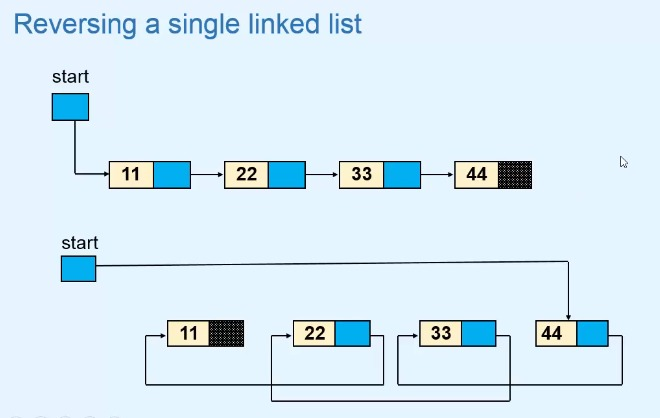

In [ ]:
prev = None
p = self.start   #p refers to first node
while p is not None: 
    next = p.link   #next refers to second | next refers to "next of p"   as of now, prev, p, next are onto three consecutive nodes  | next moves forward | int the last loop, next will become None.
    p.link = prev   #making the first node None, as prev is None |  p will refer to its previous after first loop | this is the crux of whole loop, p.link refers to its previous
    
    prev = p        #prev comes to first   |  prev moves forward  
    p = next        #p moves forward    | p moves forward

self.start = prev  # After both p and next are None, and prev is refering to the last(og last) node, this statement makes start refer to the (og) last, hence making it the first, and we are done.


## Sorting a LL using Bubble Sort:
Method 1: BY Exchanging data: 
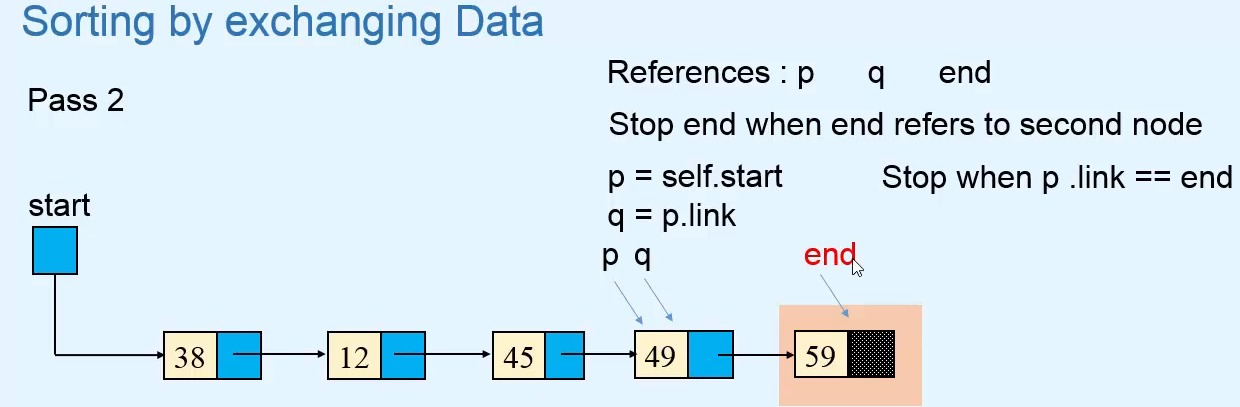


Method 2: BY Rearranging links
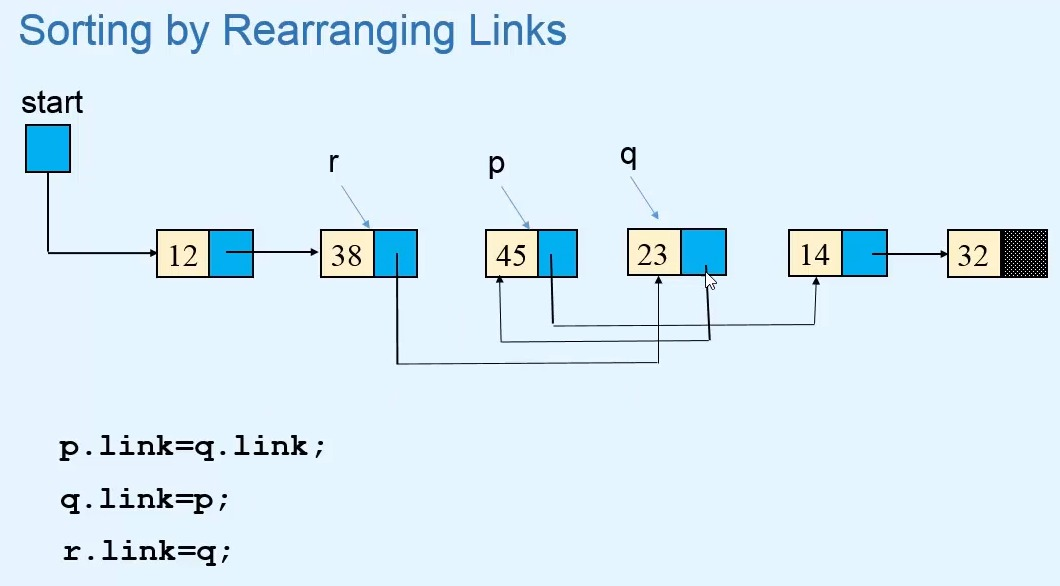

In [ ]:
#in arrays we exchanged data to sort, here we have two methods
# 1. sorting by exchanging data
    # Lets have three references, p q and end
    # and a LL of 5 nodes
    # will need 4 passes to sort it.
    # end will be None at first pass, then refer to last node, then second last and so on
    # so will stop when end refers to second node. 
    p = self.start  #p refers 1st node
    q = p.link      #q refers 2nd node
    # will stop when p.link == end 
    #PAss1: p ref to 1 and q to 2, if q<p swap and move forward, else move forward till p.link==end, pass1 ends
    # now, last item is in sorted place. end--
    #PAss2: again, initialize p and q as above, compare swap bla bla.
    # end-- or end = where p stopped last time. same thing
    #CONTINUE TILL end reaches 2nd node
    end = None        #right
    while end != self.start.link:   #2nd node
        p = self.start              #initialising p with 1st node
        while p.link != end:        #right
            q = p.link              
            if p.info > q.info:           
                p.info,q.info = q.info,p.info
            p = p.link              #moving p forward, hence q too. till it reaches end. all this till end reaches 2nd node.
        end = p                     #setting end where p left off at the end of a pass where p.link == end. therefore essentially, end--

# 2. sorting by exchanging links
        end = None
        while end != self.start.link:
            r = p = self.start        #r will always be behind p, (r is predecessor to p)
            while p.link != end:
                q = p.link
                if p.info > q.info :
                    p.link = q.link        #we aint swapping the values, instead we changing the links, thats why we need r, p.link rn refers, q but it should go to the next (to refer q.link), as p.info is bigger.
                    q.link = p             #and q.link should refer to its previous, that is where p is refering to. (yes, still)
                    if p!=self.start:      #ignoring this for now
                        r.link = q         #then r.link should refer to q, so finally the new sequence is r q p. previously was r p q
                    else:
                        self.start = q     
                    p,q = q,p               # exchanging p and q for the next pass. the sequence now is r p q but values are sorted in that area.
                r = P
                p = p.link
            end = p

## Merging Two Sorted Lists.
### 1. Merging by creating new list
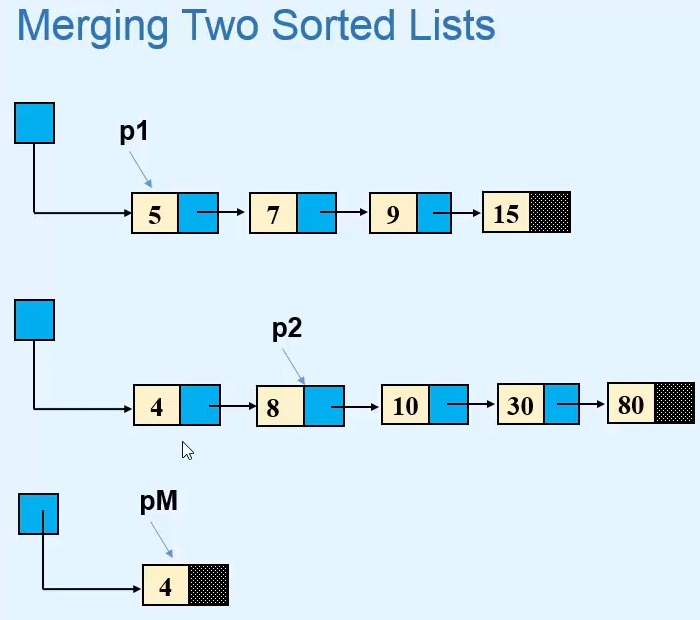



### 2. Merging by rearranging links (imp)
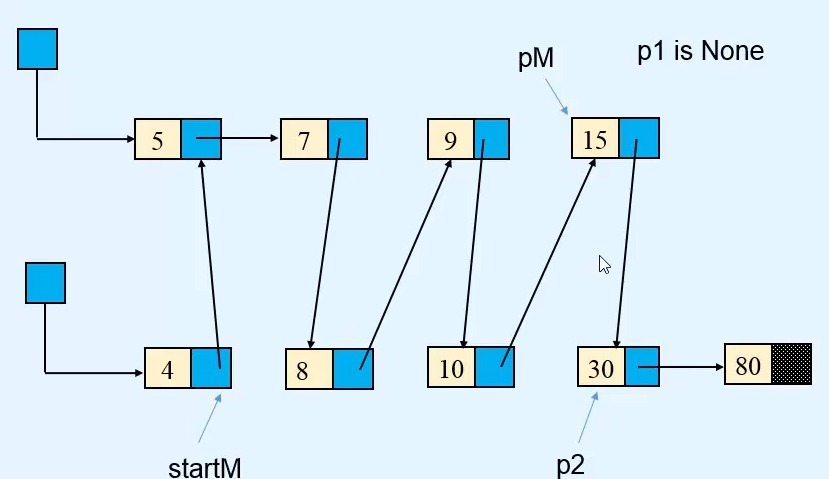

In [ ]:
# let p1 be running ref of list1, p2 likewise and let pM be ref to last node of the new merged list. so that we can readily "add new nodes at the end". 
# rest is merge sort algorithm.
#code: 
class Node:
    def __init__(self, value):
        self.info = value
        self.link = None

class SingleLinkedList:
    def __init__(self):
        self.start = None

    def display_list(self):
        if self.start is None:
            print("List if empty")
            return
        else:
            print("List is: ")
            p = self.start
            while p is not None:
                print(p.info, " ", end='')
                p=p.link
            print()
    
    def insert_at_end(self, data):
        temp = Node(data)
        if self.start is None:
            self.start = temp
            return
        
        p = self.start
        while p.link is not None:
            p = p.link
        p.link = temp

    def create_list(self):
        n = int(input("Enter the number of nodes : "))
        if n == 0:
            return
        for i in range(n):
            data = int(input("Enter the element to be inserted : "))
            self.insert_at_end(data)
    
    def bubble_sort_exdata(self):
        end = None              #explanation belowe

        while end != self.start.link:
            p = self.start
            while p.link != end:
                q = p.link
                if p.info > q.info:
                    p.info,q.info = q.info,p.info
                p = p.link
            end = p
    def mergel(self, list2):
        merge_list = SingleLinkedList()
        merge_list.start = self._merge1(self.start, list2.start)
        return merge_list
    
    def _merge1(self, p1, p2):
        if p1.info <= p2.info:
            startM = Node(p1.info)
            p1 = p1.link
        else:
            startM = Node(p2.info)
            p2 = p2.link;
       
        pM = startM
       
        while p1 is not None and p2 is not None:
            if p1.info <= p2.info:
                pM.link = Node(p1.info)
                p1 = p1.link
            else:
                pM.link = Node(p2.info)
                p2 = p2.link;
            pM = pM.link;
        
        #If second list has finished and elements left in first list
        while p1 is not None:
            pM.link = Node(p1.info)
            p1 = p1.link
            pM = pM.link

        #If first list has finished and elements left in second list
        while p2 is not None:
            pM.link = Node(p2.info)
            p2 = p2.link
            pM = pM.link
        
        return startM
    
#merging with rearranging links.
    def merge2(self,list2):
        merge_list = SingleLinkedList()
        merge_list.start = self._merge2(self.start, list2.start)
        return merge_list
    
    def _merge2(self, p1, p2):
        
        if p1.info <= p2.info:
            startM = p1
            p1 = p1.link
        else:
            startM = p2
            p2 = p2.link
        
        pM = startM
        
        while p1 is not None and p2 is not None:
            if p1.info <= p2.info:
                pM.link = p1
                pH = pM.link
                p1 = p1.link
            else:
                pM.link = p2
                pH = pM.link
                p2 = p2.link
        if p1 is None:
            pM.link = p2
        else:
            pM.link = p1
        
        return startM

In [ ]:
list1 = SingleLinkedList()

list2 = SingleLinkedList()
list1.create_list()

list2.create_list()
list1.bubble_sort_exdata()
list2.bubble_sort_exdata()

print("First List — "); list1.display_list()
print("Second List - "); list2.display_list()
list3 = list1.mergel(list2)

print("Merged List — "); list3.display_list()
print("First List - "); list1.display_list()
print("Second List - "); list2.display_list()
list3 = list1.merge2(list2)

print("Merged List — "); list3.display_list()
print("First List - "); list1.display_list()
print("Second List - "); list2.display_list()

Enter the number of nodes : 4
Enter the element to be inserted : 1
Enter the element to be inserted : 2
Enter the element to be inserted : 3
Enter the element to be inserted : 4
Enter the number of nodes : 5
Enter the element to be inserted : 3
Enter the element to be inserted : 5
Enter the element to be inserted : 6
Enter the element to be inserted : 1
Enter the element to be inserted : 1
First List — 
List is: 
1  2  3  4  
Second List - 
List is: 
1  1  3  5  6  
Merged List — 
List is: 
1  1  1  2  3  3  4  5  6  
First List - 
List is: 
1  2  3  4  
Second List - 
List is: 
1  1  3  5  6  
Merged List — 
List is: 
1  5  6  
First List - 
List is: 
1  5  6  
Second List - 
List is: 
1  1  3  5  6  


## Merge Sort in LL


In [ ]:
def merge_sort(self):
    self.start = self._merge_sort_rec(self.start)

def _merge_sort_rec(self,list_start):
    #if list empty or has one element
    if list_start is None or list_start.link is None:
        return list_start
    
    #if more than one element
    start1 = list_start
    start2 = self._divide_list(list_start)     #divide the list into two and start1 is one lists' start node and start2 is seconds' start node
    start1 = self._merge_sort_rec(start1)      #recursify or whatever
    start2 = self._merge_sort_rec(start2)
    startM = self._merge2(start1, start2)       
    return startM


def _divide_list(self, p):                             # p refers to 1st node and q refers to 3rd node of the LL    
    q = p.link.link
    whiie q is not None and q.link is not None:
        p = p.link                                     #we are moving p one nodes at a time and q two nodes at a time, so that when the loop terminates, we end up at p being at middle, or at floor(n) where n is total no. of nodes 
        q = q.link.link            
    start2 = p.link                                    #start2 refers to next node of the middle and then making p.link=none, terminates the first link and hence divide.
    p.link = None
    return start2                                      #start2 and start1 are two divided linked lists now.

## Detect and remove a cycle from a LL       
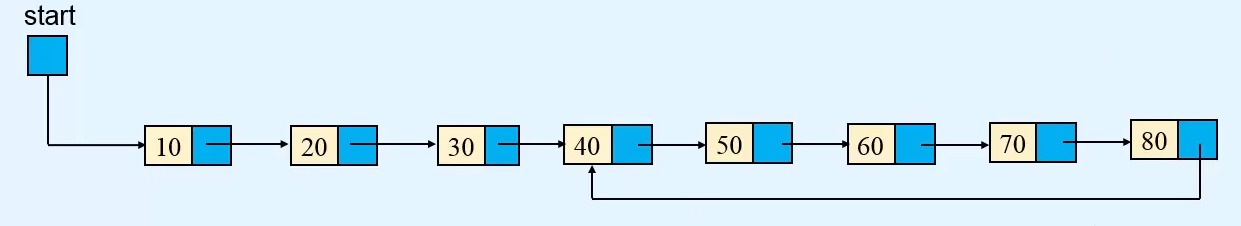


In [ ]:
# one way would be adding a visited flag for each node. you know how it goes.
# another way would be "hare and tortoise algorithm" or "Floyd's Cycle detection algorithm", both are same
    # we have two references here, one fast the hare and one slow the tortoise, if the ll is None terminated, they wont meet and hare would win definitely
    # but if its not None terminated, it means it has a cycle and hence they will meet at some point, (which is not the first node) coz they start at same obv/

def find_cycle(self):
    if self.start is None or self.start.link is None:         #if the list is empty or has only node in it. 
        return None                                     #None means, no cycle found.
    
    slowR = self.start                                        #just to clear, self.start here means they refer to first element of the list., rest is clear.
    fastR = self.start
    
    while fastR is not None and fastR.link is not None:           
        slowR = slowR.link
        fastR = fastR.link.link
        if slowR == fastR:
            return slowR
    return None


#How to remove the cycle. 
#first we have to find the lenght of the list.
#therefore we'll have to find length of the cycle. becoz, "length of LL" =  "no. of nodes in the cycle" + "no. of nodes outside it".
def remove_cycle(self):
    c = self.find_cycle()                     #we have to go to the node which detected the cycle, will make two references at this node, one stays here, other moves (one full cycle), to find cycle length. 
    if c is None:
        return
    print("Node at which the cycle was detected is " , c.info)
    
    p = c
    q = c
    len_cycle = 0
    
    while True:
        len_cycle+=1
        q = q.link
        if p == q:
            break;
    print("Length of cycle is :", len_cycle)
          
#now as we found the length of the cycle, length of rem list=: take p to start and leave q where it was(the detect node) and move each by one, when they meet, thats the no. of rem list, coz they meet the first node of the cycle hence p covers the remaining nodes from the start.
    len_remplist = 0
    p = self.start
    while p!=q:
        len_remplist+=1
        p = p.link
        q = q.link
    
    print("Number of nodes not included in the cycle are : ", len_remplist)
    length_list = len_cycle + len_remplist
    print("Length of the list is : " , length_list)              
    
    p = self.start
    for i in range(length_list—l):         #trick is to move p from the start to length-1 no. of nodes so it reaches the actual end of the list and we can make it none hence, deleting a cycle. 
        p = p.link
    p.link = None


Inserting a cycle: 
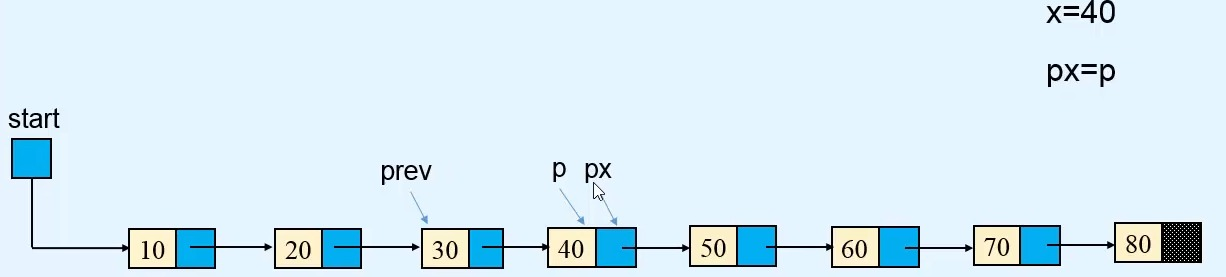

In [ ]:

#How to Insert a CYCLE
def insert_cycle(self,x):       #inserting a cycle at node x
    if self.start is None:     #incase its a empty list.     
        return

    p = self.start            
    px = None                     
    prev = None                     #prev will always remain behind p
    
    while p is not None:            
        if p.info == x:             #Clear
            px = p
        prev = p                    #so that at the end of the loop, prev will be at x node and p will be the next of it. and the end of the loop is when p becomes None, hence prev is the last element of the LL
        p = p.link                  #As a side note, when soemthing.link is on right side of assignment stmt, its the next node, when its on left, we are changing the node itself (the link part of the node). 
    if px is not None:              #thats when we found x. 
        prev.link = px              #the last element's link is being changes to px, hence creating a cycle. 
    else:                           #we did not found x
        print(x , " not present in list")



---





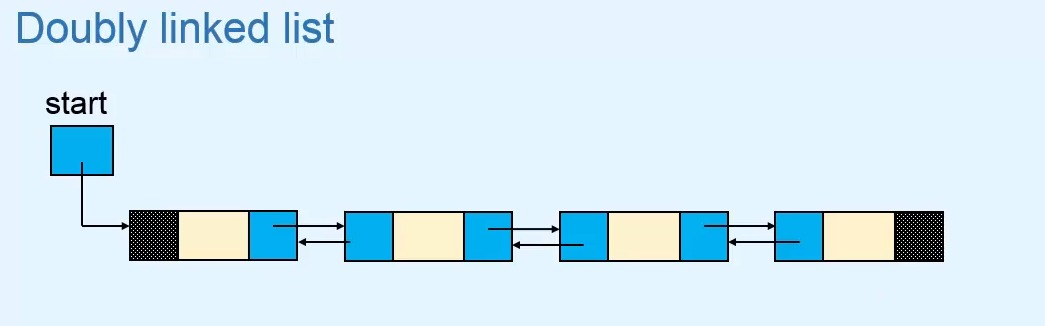

In [ ]:
# one info part and two link parts, 1st link of first node is None, and last link of last node is none
# disadvantages: While inserting and deleting, some extra steps are required for maintaining the previous link
class Node(object):
    def __init__(self,value):
        self.info = value
        self.prev = None
        self.next = None


class DoubleLinkedList(object):
    def __init__(self):
        self.start = None


    def display_list(self):
        if self.start is None:
            print("List is empty")
            return
        
        print("List is : ", end='')
        p = self.start
        while p is not None:
            print(p.info, " ", end='')
            p = p.next
        print()
    
    
    def insert_in_beginning(self,data):
        temp = Node(data)
        temp.next = self.start
        self.start.prev = temp
        self.start = temp


    def insert_in_empty_list(self,data):
        temp = Node(data)
        self.start = temp
            
    
    def insert_at_end(self,data):
        temp = Node(data)
        p = self.start
        while p.next is not None:
            p = p.next
        p.next = temp
        temp.prev = p


    def create_list(self):
        n = int(input("Enter the fumber of nodes : "))
        if n == 0:
            return
        data = int(input("Enter the first element to be inserted : "))
        self.insert_in_empty_list(data)
    
        for i in range(n-1):
            data = int(input("Enter the next element to be inserted : "))
            self.insert_at_end(data)


    def insert_after(self,data, x):
        temp = Node(data)
        p = self.start
        while p is not None:
            if p.info == x:
                break
            p = p.next
        
        if p is None:
            print(x," not present in the list")
        else:
            temp.prev = p
            temp.next = p.next
            if p.next is not None:
                p.next.prev = temp # should not be done when p refers to last node
            p.next = temp


    def insert_before(self,data,x):
        if self.start is None:
            print("List is empty")
            return
        
        if self.start.info == x:
            temp = Node(data)
            temp.next = self.start
            self.start.prev = temp
            self.start = temp
            return
        
        p = self.start
        while p is not None:
            if p.info == x:
                break
            p = p.next
        
        if p is None:
            print(x, " not present in the list")
        else: 
            temp = Node(data)
            temp.prev = p.prev
            temp.next = p
            p.prev.next = temp
            p.prev = temp
    
    
    def delete_first_node(self):
        if self.start is None: # list is empty
            return
        if self.start.next is None: # list has only one node
            self.start = None
            return

        self.start = self.start.next
        self.start.prev = None


    def delete_last_node(self):
        if self.start is None: # list is empty
            return
        if self.start.next is None: # list has only one node
            self.start = None
            return

        p = self.start
        while p.next != None:
            p = p.next
        p.prev.next = None


    def delete_node(self,x):
        if self.start is None: # list is empty
            return
        if self.start.next is None: # list has only one node
            if self.start.info == x:
                self.start = None
            else:
                print(x," not found")
            return
        
        # Deletion of first node
        if self.start.info == x:
            self.start = self.start.next
            self.start.prev = None
            return
        
        p = self.start.next 
        while p.next is not None:
            if p.info == x:
                break
            p = p.next

        if p.next is not None : # node to be deleted is in between
            p.prev.next = p.next
            p.next.prev = p.prev
        else: # p refers to last node
            if p.info == x: # node to be deleted is last node
                p.prev.next = None
            else:
                print(x," not found")


    def reverse_list(self):
        if self.start is None:
            return 
        p1 = self.start
        p2 = p1.next
        p1.next = None
        p1.prev = p2
       

        while p2 is not None:
            p2.prev = p2.next
            p2.next = p1
            p1 = p2
            p2 = p2.prev
        self.start = p1
        

In [ ]:
list = DoubleLinkedList()
list.create_list()

Enter the fumber of nodes : 3
Enter the first element to be inserted : 10
Enter the next element to be inserted : 20
Enter the next element to be inserted : 30


In [ ]:
list.display_list()

List is : 10  20  30  


## **Insertion** in the beginning
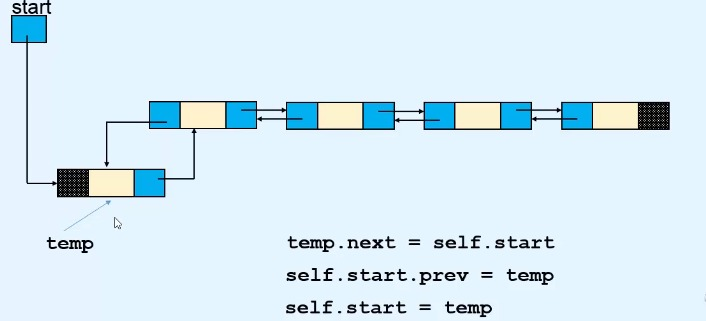

In [ ]:
temp = Node(5)
temp.next=list.start
list.start.prev = temp
list.start = temp

list.display_list()

List is : 10  20  30  


## **Insertion in an empty list**

In [ ]:
temp = Node(5)
list.start = temp

## Insertion at the end of a list

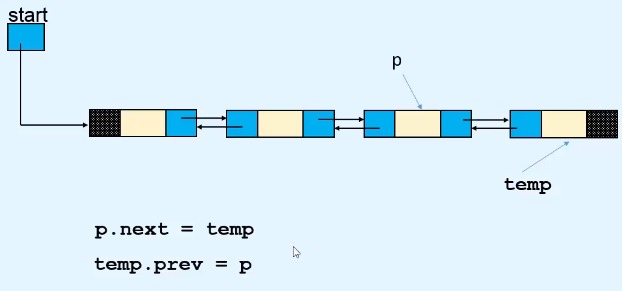

In [ ]:
# p should refer to last node. 
p.next = temp
temp.prev = p

### Insertion after a node
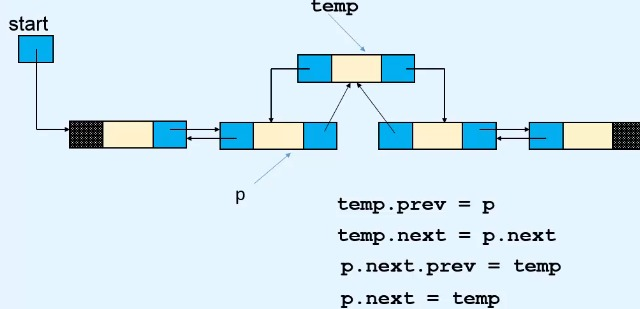

In [ ]:
# p should refer to previous node
temp.prev = p
temp.next = p.next
p.next.prev = temp        #the prev link part of (p.next) node should refer to temp.
p.next = temp             #the next link part of p node should refer to temp.
#order is important


## Insertion before a node


In [ ]:
#p should refer to the node we are talking about. (the one suppose to be next to temp.)
temp.prev = p.prev 
temp.next = p 
p.prev.next = temp
p.prev = temp

# note the differnce, image is same though (except p), have a look at class code

## Deletion

deletion in between the list.
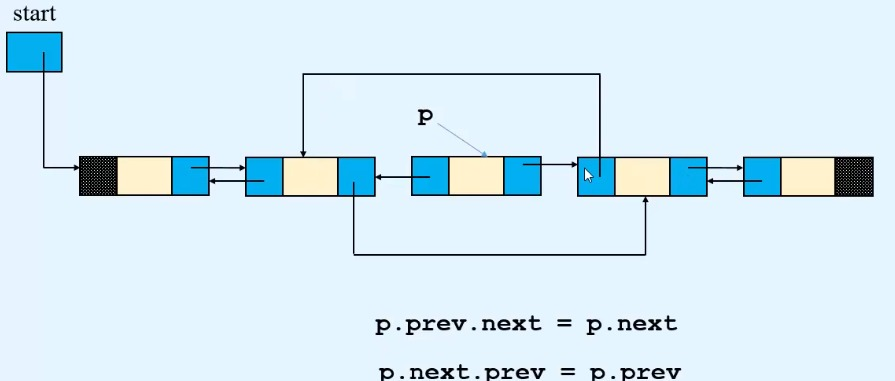

In [ ]:
# removing the first
list.start = list.start.next
self.start.prev = None

#delete the entire list
self.start=None

# deletion in between the list
p.prev.next = p.next
p.next.prev = p.prev   #clear

# deletion of last node
p.prev.next = None 

## Reversing A DOUBLY LINKED LIST

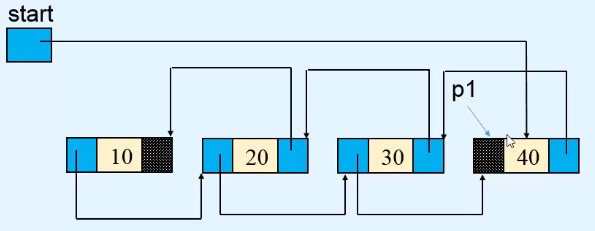

---

image after first pass

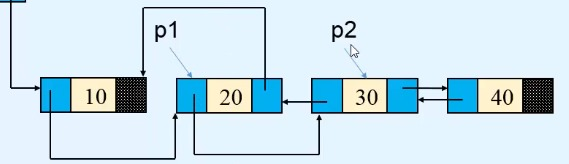

In [ ]:
#p1 refers to first node, p2 to second, p1's next becomes none and its prev refers p2, thats all this the while loop
p1 = list.start
p2 = p1.next
p1.next = None
p1.prev = p2
while p2 is not None:         
    p2.prev = p2.next               #p2's prev is pointing to 3rd node (in first pass)
    p2.next = p1                    #and its (p2) next is refering to previous node, that is p1
    p1 = p2                         #p1 moves ahead
    p2 = p2.prev                    #p2 moves ahead  this is tricky, p2.prev refers to the 3rd node (or the next node), the image is after 1st pass. 
list.start = p1

---
---

# CIRCULAR LINKED LIST
its better to have a reference to the last node of a cll, that way you can insert easily (in O(1)) at front and back.

its also a good implementation of QUEUE

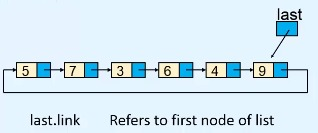

In [ ]:
class Node(object):
    def __init__(self, value):
        self.info = value
        self.link = None


class CircularLinkedList(object):

    def __init__(self):
        self.last = None


    def display_list(self):
        if self.last == None:
            print("List is empty\n")
            return

        p = self.last.link           #p refers to the first node, (last.link)
        
        while True:
            print(p.info , " ",end='')
            p = p.link 
            if p == self.last.link:         #therefore, traversing the whole list.
                break
        print()


    def insert_in_beginning(self,data):
        temp = Node(data)
        temp.link = self.last.link
        self.last.link = temp


    def insert_in_empty_list(self,data):
        temp = Node(data)
        self.last = temp
        self.last.link = self.last


    def insert_at_end(self,data):
        temp = Node(data)
        temp.link = self.last.link
        self.last.link = temp
        self.last = temp


    def create_list(self):
        n = int(input("Enter the number of nodes : "))
        if n == 0:
            return
        data = int(input("Enter the element to be inserted : "))
        self.insert_in_empty_list(data)
        
        for i in range(n-1):
            data = int(input("Enter the element to be inserted : "))
            self.insert_at_end(data)
    
    
    def insert_after(self, data, x):
        p = self.last.link

        while True:
            if p.info == x:
                break
            p = p.link
            if p == self.last.link:
                break
        
        if p == self.last.link and p.info != x:
            print(x , " not present in the list")
        
        else: 
            temp = Node(data)
            temp.link = p.link
            p.link = temp
            if p == self.last:
                self.last = temp
        
        
    def delete_first_node(self):
        if self.last is None: # List is empty
            return
        
        if self.last.link == self.last: # List has only one node
            self.last = None 
            return
        self.last.link = self.last.link.link


    def delete_last_node(self):
        if self.last is None: # List is empty
            return
        if self.last.link == self.last: # List has only one node
            self.last = None
            return

        p = self.last.link
        while p.link != self.last:
            p = p.link
        p.link = self.last.link
        self.last = p
    
    
    def delete_node(self, x):
        if self.last is None: # List is empty
            return
        
        if self.last.link == self.last and self.last.info == x: # Deletion of only node
            self.last = None
            return
            
        if self.last.link.info == x: # Deletion of first node
            self.last.link = self.last.link.link
            return
        
        p = self.last.link
        while p.link != self.last.link:
            if p.link.info == x :
                break
            p = p.link
        if p.link == self.last.link:
            print(x , " not found in the list")
        else:
            p.link = p.link.link
            if self.last.info == x:
                self.last = p

In [ ]:
clist= CircularLinkedList()
clist.create_list()

Enter the number of nodes : 2
Enter the element to be inserted : 10
Enter the element to be inserted : 20


In [ ]:
clist.display_list()

5  5  10  20  


## Insertion in a CLL


insertion at the end: (in progress)

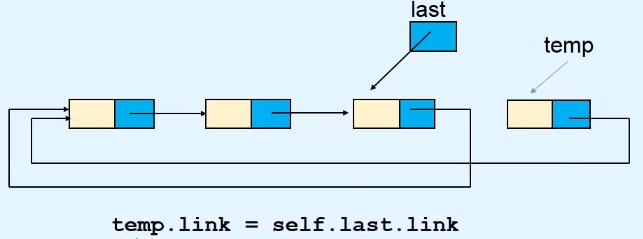

In [ ]:
#insertion in the beginning of the list
temp = Node(5)

temp.link = clist.last.link 
clist.last.link = temp

#insertion in an empty list
self.last = temp
clist.last.link = clist.last  #unit cycle


# insertion at the end of the list.
temp.link = clist.last.link  # temp should refer to 1st node.
clist.last.link = temp       # the so previous last node should refer to temp as thats our new last node
last = temp                 #"last" is the thing that refers to last node but hence the whole list.


#insertion in between is same as in non circular linked list.

## Deletion of Nodes in CLL

In [ ]:
#first node
clist.last.link = clist.last.link.link  #last node should refer to second node in order to eliminate the first node.

#only node in the list.
clist.last = None 

#last node
#let p be predecessor to second last.
p.link= clist.last.link    #p's link refers to 1st node now.
clist.last = p             #the last node now is p now.

#any node in between.
#let p be predecessor to the node.
p.link = p.link.link   #same as non circular ll

#see the code in the class.


---
# **Concatenation in single linked list**

add two single lists. 
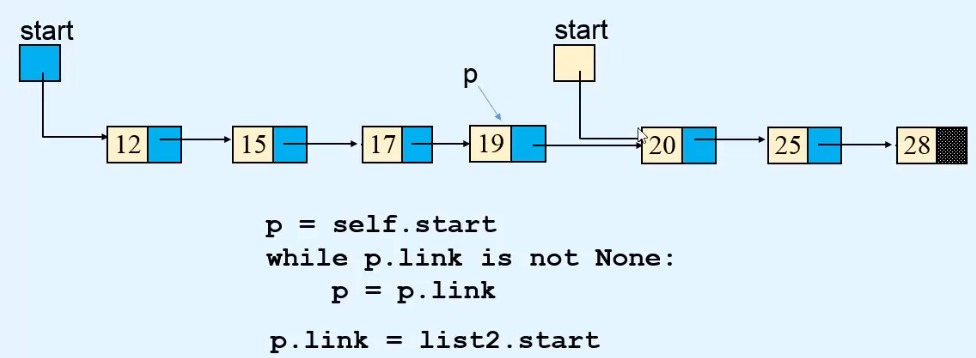

In [ ]:
 #find last node of first list, let it be p
p= slist1.start
while p.link is not None:
    p = p.link

#now link of this (last of 1) should refer to first of 2nd.
p.link = slist2.start  #only start yes.

#code for a class: 
def concatenate(self, list2):
    if self.start is None:
        self.start = list2.start
        return
    
    if list2.start is None:
        return
    
    p = self.start
    while p.link is not None:
        p = p.link

    p.link = list2.start


# **Concatenation in circular linked lists**

(in progress) 
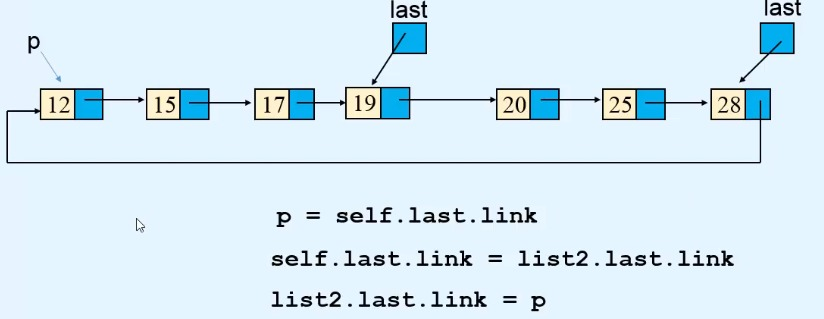

In [ ]:
p = clist1.last.link  #we only add this becoz, without it if we run next line, we loose reference to the first node of the first list. now we have p on it
clist1.last.link = clist2.last.link   #last node of first list refers to first node of second list.
clist2.last.link = p           #last node of second list should point to first node of first list.

clist1.last = clist2.last   #making both the "last" refer to the last.


#code for the class.
def concatenate(self, list2):
    if self.last is None:
        self.last = list2.last
        return
    
    if list2.last is None:
        return 

    p = self.last.link
    self.last.link = list2.last.link
    list2.last.link = p
    self.last = list2.last


---
# **Header Node in a linked list**

an extra node at the beginning of the the list. with extra value (could be used for anything.) theres a head reference which always points to the header node. and link part of the header node points to the first node of the list. 

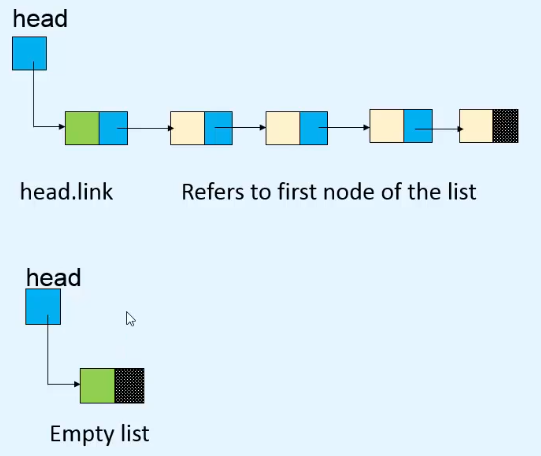

In [ ]:
class Node(object):
    def __init__(self, value):
        self.info = value
        self.link = None
    
class HeaderLinkedList(object):
    def __init__(self):
        self.head = Node(0)
    
    def display_list(self):
        if self.head.link == None:
            print("list is empty")
            return

        p = self.head.link
        print("list is: ", end='')
        while p is not None:
            print(p.info, " ", end='')
            p = p.link
        print()

    def create_list(self):
        n = int(input("Enter the number of Nodes: "))
        for i in range(n):
            data = int(input("Enter the element to be inserted: "))
            self.insert_at_end(data)
    
    def insert_at_end(self, data):
        temp  = Node(data)
                                        #in singular ll, we had another block saying if self.start is None: self.start=temp and return, rest is same.
        p = self.head
        while p.link is not None:
            p = p.link
        p.link = temp

    def insert_before(self, data, x):
        #Find refernce to predecessor of node containing x
        p = self.head                    #in singular ll, we had, other conditions if #if listisempty and #if x is first node, rest is same
        while p.link is not None:
            if p.link.info == x:
                break
            p=p.link

        if p.link is None:
            print(x, "Not present in the list")
        else:
            temp = Node(data)
            temp.link = p.link
            p.link = temp

    def insert_at_position(self, data, x):
        p = self.head                #is singular ll, k==1 was another condition, but not here, rest is same
        i =  1
        while i <= k-1 and p is not None:
            p = p.link
            i+=1
        
        if p is None:
            print("You can insert only upto ", (i-1), "th position")
        else:
            temp = Node(data)
            temp.link = p.link
            p.link = temp
        
    def delete_node(self, data):             #here also, in sll, list empty or with one node, had to be in another case/block of code
        p = self.head
        while p.link is not None:
            if p.link.info == data:
                break 
            p = p.link

        if p.link == None:
            print(data, " not found")
        else: 
            p.link = p.link.link
        
    def reverse_list(self):
        prev = None
        p = self.head.link
        while p is not None:
            next = p.link
            p.link = prev 
            prev = p
            p = next

        self.head.link = prev 


In [ ]:
hlist = HeaderLinkedList()
hlist.create_list()
hlist.display_list()
hlist.reverse_list()
hlist.display_list()

Enter the number of Nodes: 3
Enter the element to be inserted: 2
Enter the element to be inserted: 4
Enter the element to be inserted: 6


---
---
# **SORTED LINKED LIST**

In [ ]:
class Node(object):
    def __init__(self, value):
        self.info = value
        self.link = None

class SortedLinkedList(object):
    def __init__(self):
        self.start = None

    def insert_in_order(self, data):
        temp = Node(data)

        #List empty or node to be inserted before first node
        if self.start == None or data<self.start.info:
            temp.link = self.start
            self.start = temp
            return
        
        p = self.start
        while p.link is not None and p.link.info <= data:
            p=p.link 
        temp.link = p.link
        p.link = temp

    def create_list(self):
        n = int(input("enter the number of nodes : "))
        if n == 0:
            return
        
        for i in range(n):
            data = int(input("Enter the element to be inserted: "))
            self.insert_in_order(data)
    
    def search(self, x):
        if self.start is None:
            print("list is epmty")
            return
        p = self.start
        position = 1
        while p is not None and p.info <=x:
            if p.info == x:
                break
            position+=1
            p = p.link
        
        if p is None or p.info !=x:
            print(x, "not found in list")
        else:
            print(x, "is at position", position)

    def display_list(self):
        if self.start is None:
            print("list is empty")
            return
        print("list is: ", end= '')
        p =self.start
        while p is not None:
            print(p.info, " ", end = '')
            p = p.link
        print()

ifno

NameError: ignored

In [ ]:
sorlist = SortedLinkedList()
sorlist.create_list()


enter the number of nodes : 3
Enter the element to be inserted: 50
Enter the element to be inserted: 30
Enter the element to be inserted: 10


In [ ]:
sorlist.display_list()

list is: 10  30  50  


In [ ]:
sorlist.search(30)

30  is at position 2




---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---

---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---

---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---